# Simple Example 

In [1]:
from common.ETLBase import PipelineBuilder, PipeConfigBuilder

In [2]:
config = PipeConfigBuilder()
pipe = PipelineBuilder(config)

In [3]:
config.setups(a=1,b=2)

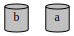

In [4]:
config.view()

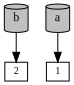

In [5]:
config.view(summary=False)

In [6]:
@pipe._func_
def plus_a_b(a=1,b=2):
    return a+b
#pipe._plus_a_b = plus_a_b

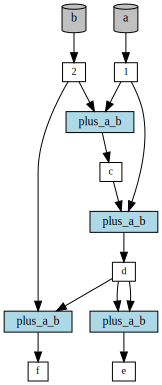

In [7]:
pipe.setup_connection('c = plus_a_b(a=a,b=b)')
pipe.setup_connection('d = plus_a_b(a=a,b=c)')
pipe.setup_connection('e = plus_a_b(d,d)')
pipe.setup_connection('f = plus_a_b(a=b,b=d)')

pipe.view(summary=False)

In [8]:
pipe.f.get()

6

# Visualization of the Data Pipeline in an Experiment 

In [9]:
from experiments.ex3.data_pipeline import pipe

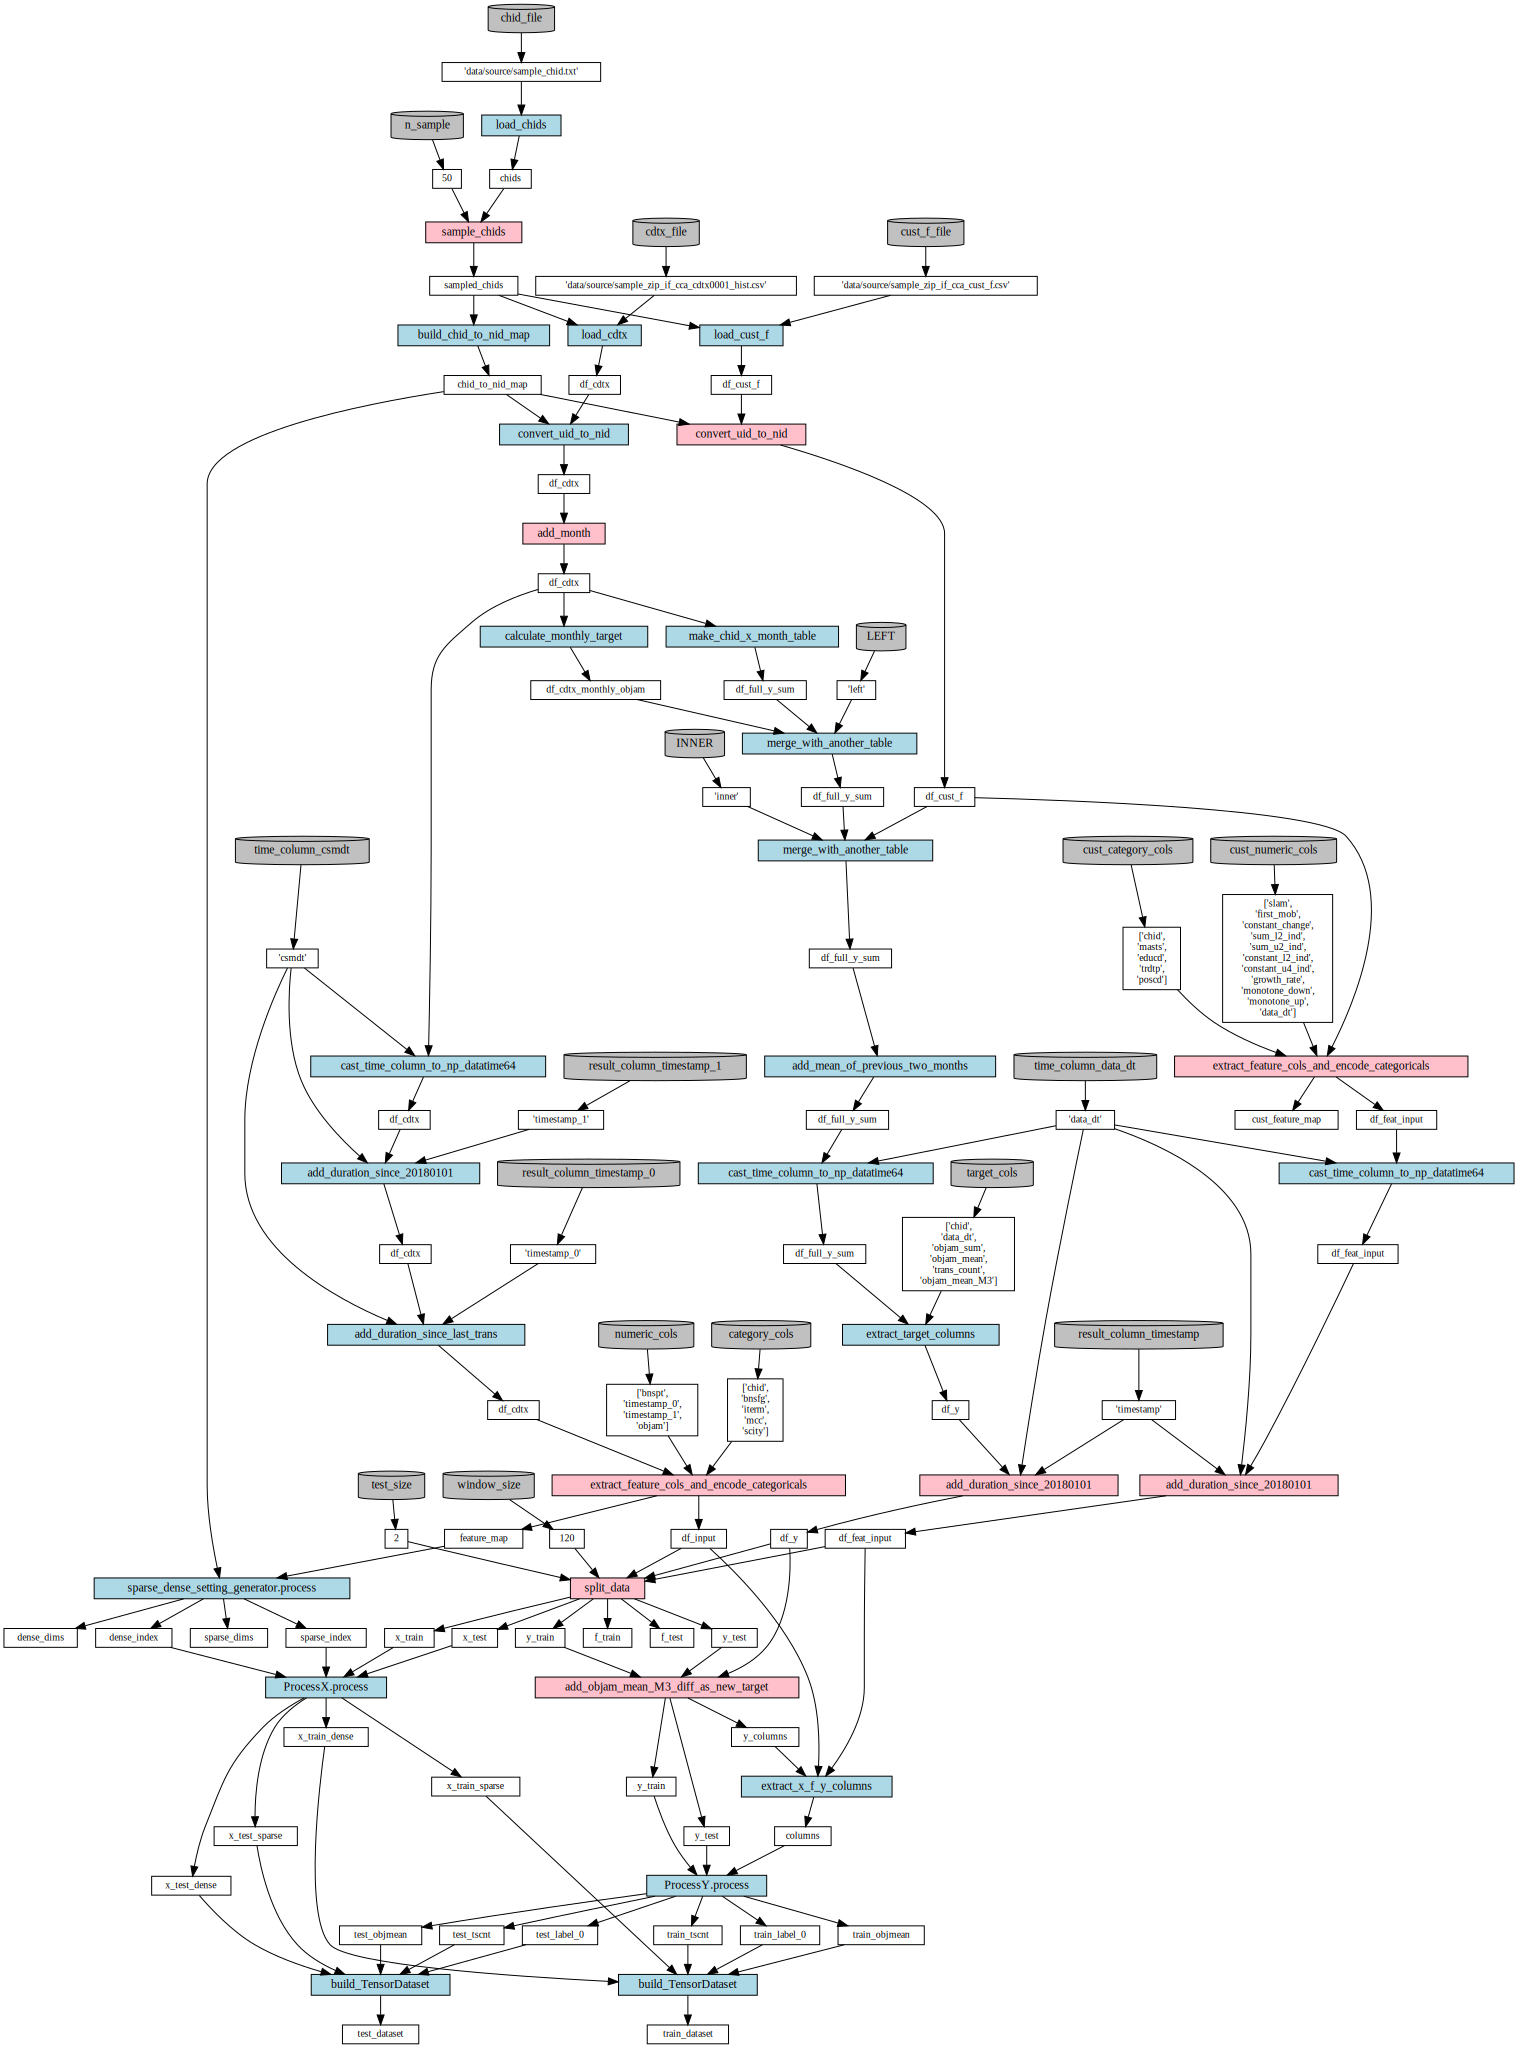

In [10]:
pipe.view(summary=False)

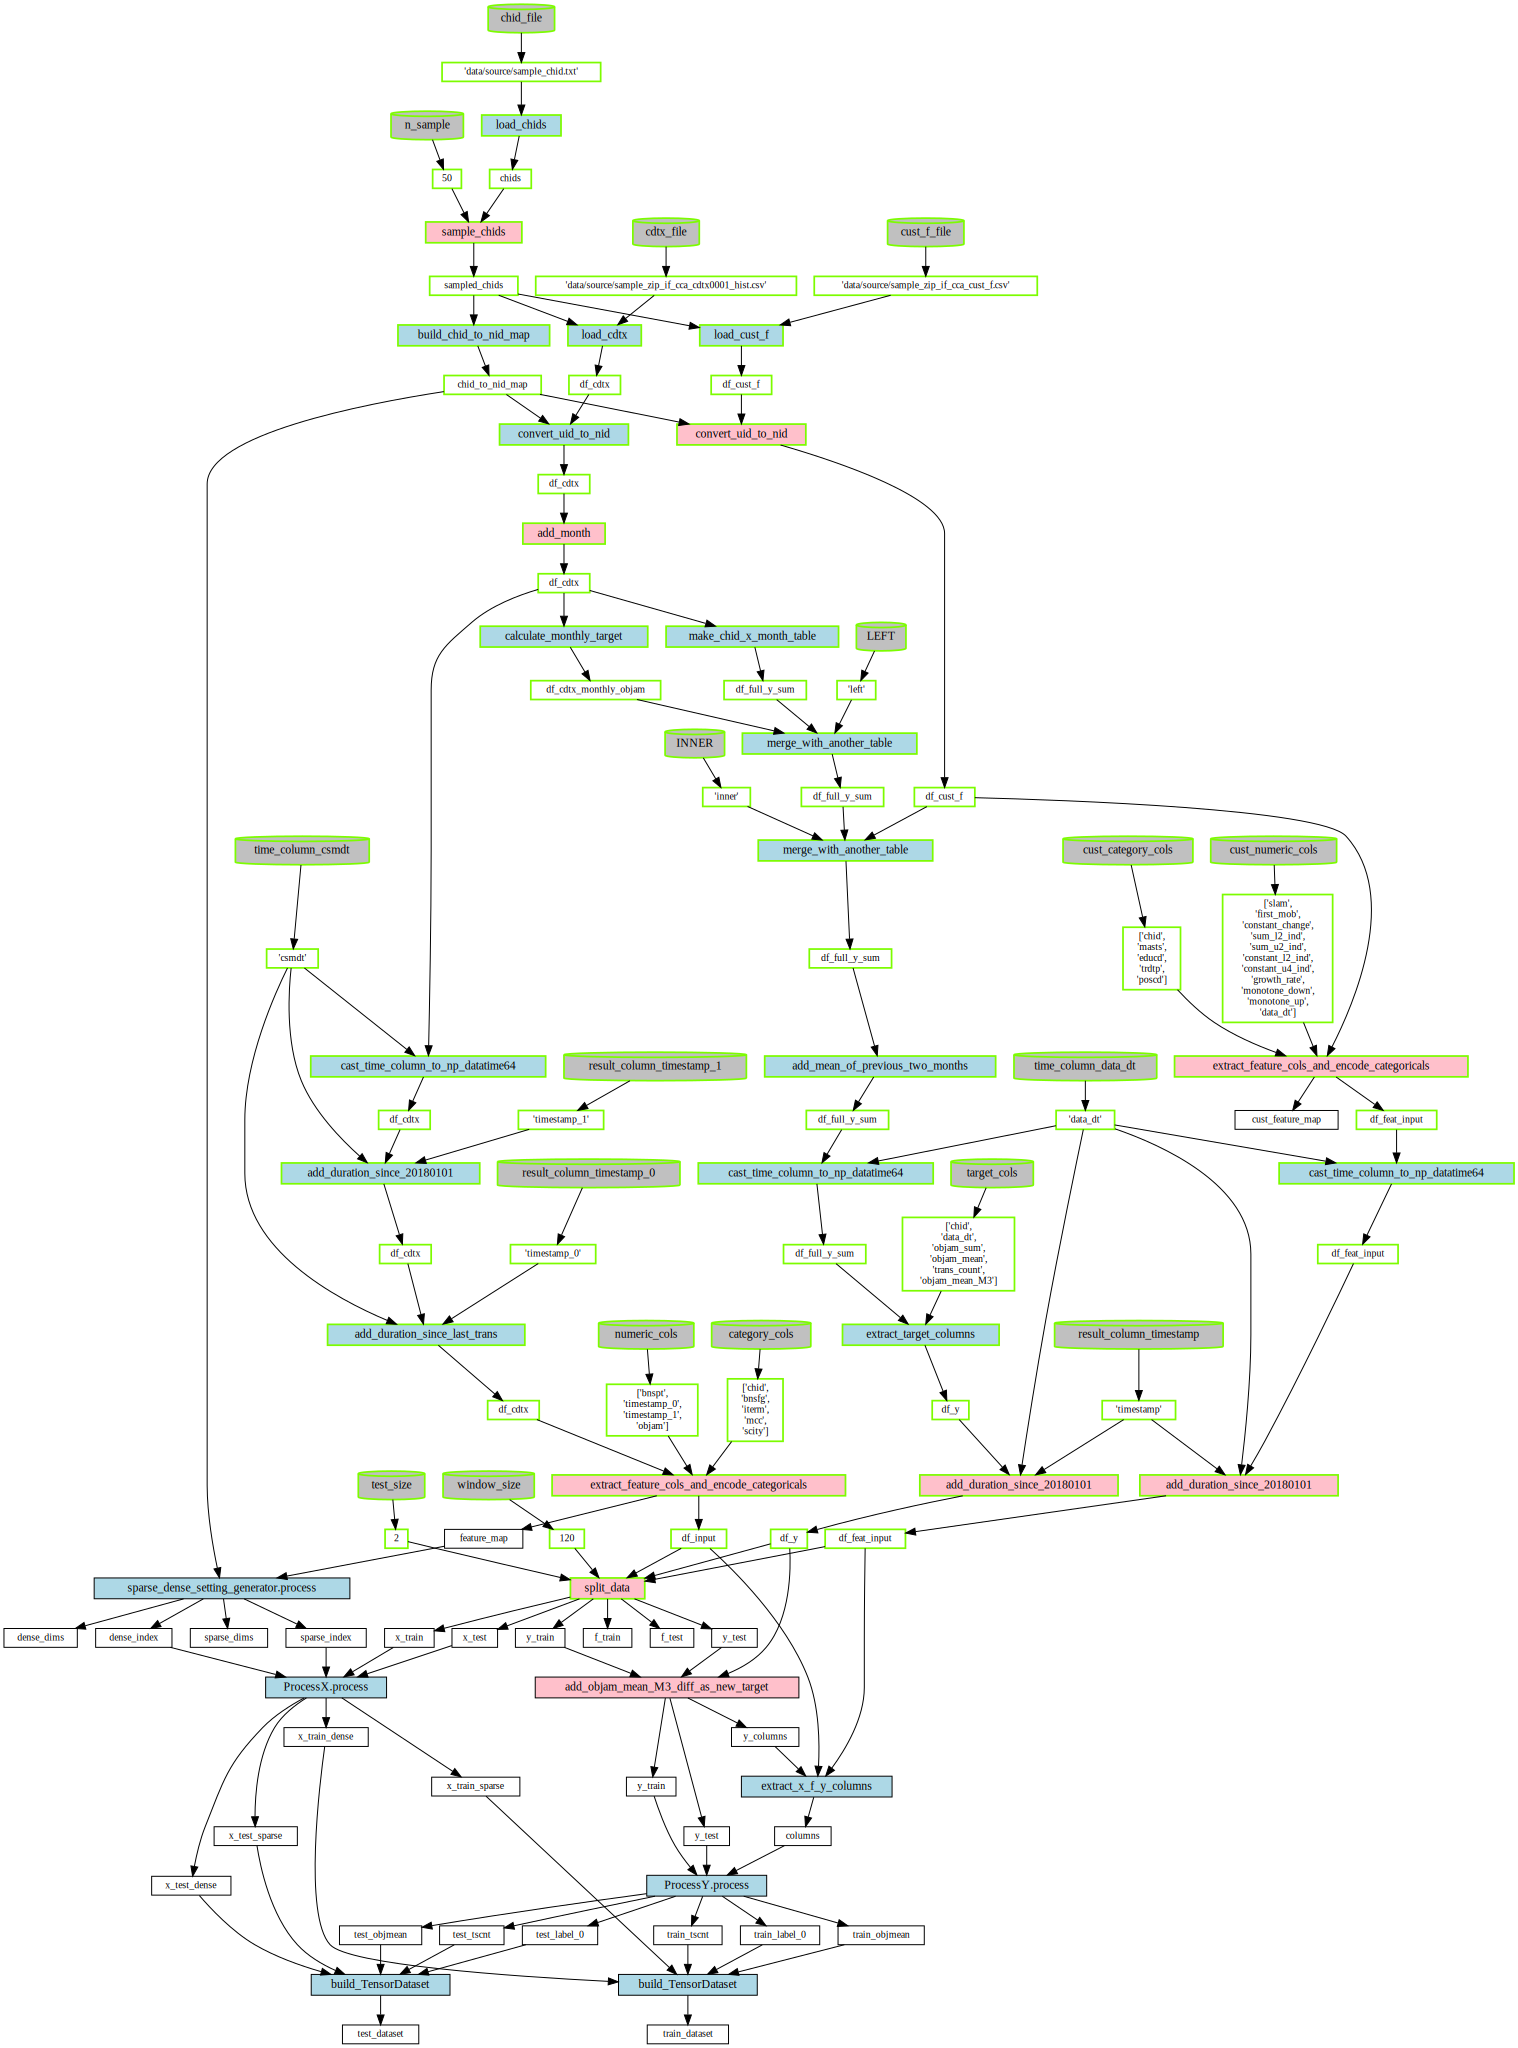

In [11]:
pipe.view_dependency('split_data',summary=False)

# Obtain values of a temporary result of the pipeline 

In [13]:
pipe.test_dataset.get(verbose=True)

[RUN] process of "process[3]"
loading time: 11.805962324142456


7755it [00:00, 1001133.50it/s]
/home/ai/work/app/ncku_customer_embedding/experiments/ex3/preprocess_modules.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result[col] = df_result[col].fillna('')
/home/ai/work/app/ncku_customer_embedding/experiments/ex3/preprocess_modules.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result[col] = df_result[col].fillna(-1)


table extracted
bnsfg na filled
iterm na filled
mcc na filled
scity na filled
all non str category col casted
mapper created
bnsfg map applied
iterm map applied
mcc map applied


/home/ai/work/app/ncku_customer_embedding/experiments/ex3/preprocess_modules.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result[col] = df_result[col].map(mapper[col])


scity map applied
loading time: 11.833598136901855
table extracted
masts na filled
educd na filled
trdtp na filled
poscd na filled
all non str category col casted
mapper created
masts map applied
educd map applied
trdtp map applied
poscd map applied
list_chid, list_month calculated
[DELETE] df_cdtx
df_cdtx grouped


100%|██████████| 50/50 [00:03<00:00, 15.86it/s]


Processing x_train
Split Sparse and Dense Parts and Apply np.float64 and np.int64, respectively
apply Log(1+x) transformation to the dense features
apply MinMaxScale((0,1)) to the dense features
Processing x_test
Split Sparse and Dense Parts and Apply np.float64 and np.int64, respectively
apply Log(1+x) transformation to the dense features
apply MinMaxScale((0,1)) to the dense features
[RUN] process of "process[2]"
Processing x_train
Split Sparse and Dense Parts and Apply np.float64 and np.int64, respectively
apply Log(1+x) transformation to the dense features
apply MinMaxScale((0,1)) to the dense features
Processing x_test
Split Sparse and Dense Parts and Apply np.float64 and np.int64, respectively
apply Log(1+x) transformation to the dense features
apply MinMaxScale((0,1)) to the dense features
[RUN] process of "process[3]"
Convert Numeric Y values to np.float64 for Regression
Apply Log(1+x) Transformation
Apply  MinMaxScaler((0,1)) to objmean
Convert objsum to class target: whether 

# Example of making modification to the pipeline 

## obtain temporary result 

In [17]:
pipe.df_y.get()

list_chid, list_month calculated
[DELETE] df_cdtx
df_cdtx grouped


100%|██████████| 50/50 [00:02<00:00, 17.69it/s]


,chid,data_dt,objam_sum,objam_mean,trans_count,objam_mean_M3,timestamp
0,1,2018-01-01,64085.0,2912.954545,22.0,21361.0,0.0
1,1,2018-02-01,75171.0,3416.863636,22.0,46418.0,31.0
2,1,2018-03-01,79063.0,3437.521739,23.0,72773.0,59.0
3,1,2018-04-01,69149.0,3457.450000,20.0,74461.0,90.0
4,1,2018-05-01,107947.0,4497.791667,24.0,85386.0,120.0
...,...,...,...,...,...,...,...
1150,50,2019-08-01,2631.0,2631.000000,1.0,8907.0,577.0
1151,50,2019-09-01,634.0,634.000000,1.0,8902.0,608.0
1152,50,2019-10-01,0.0,0.000000,0.0,1088.0,638.0
1153,50,2019-11-01,0.0,0.000000,0.0,211.0,669.0
